In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from PIL import Image

import itertools
import os
import shutil
import random
import glob
import warnings
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
train_path = 'archive/train'
valid_path = 'archive/valid'
test_path = 'archive/test'

In [4]:
# tf.keras.applications.vgg16.preprocess_input [c1, c2, c3 .......c1000] , c1 = 0.1, c2 = .02, c3 = 0.66 ...
# or
# tf.keras.applications.mobilenet.preprocess_input
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input) \
                .flow_from_directory(directory=train_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input) \
                .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input) \
                .flow_from_directory(directory=test_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [5]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100

assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [6]:
imgs, labels = next(train_batches)

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

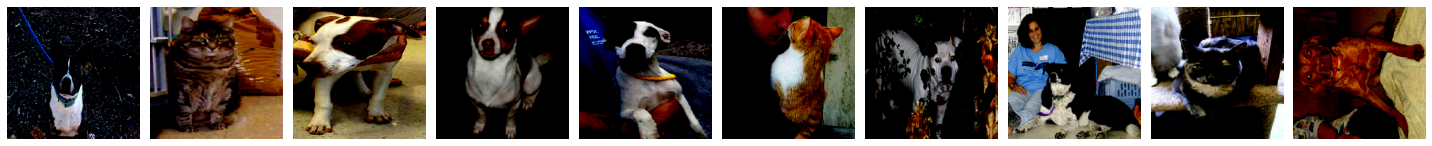

In [8]:
plotImages(imgs)

In [9]:
print(labels)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [10]:
model_own = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)), # 3 is for rgb color configuration
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'), # since ther are only two classes cats and dogs.
])

2021-12-27 12:26:20.386918: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model_own.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# if the above code gives error, then you can use binary_crossentropy.


In [12]:
model_own.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)


2021-12-27 12:26:40.828058: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
100/100 - 49s - loss: 0.6812 - accuracy: 0.5940 - val_loss: 0.6313 - val_accuracy: 0.6250
Epoch 2/20
100/100 - 46s - loss: 0.5575 - accuracy: 0.7030 - val_loss: 0.5895 - val_accuracy: 0.7000
Epoch 3/20
100/100 - 43s - loss: 0.4647 - accuracy: 0.7870 - val_loss: 0.5889 - val_accuracy: 0.7050
Epoch 4/20
100/100 - 42s - loss: 0.3743 - accuracy: 0.8490 - val_loss: 0.5859 - val_accuracy: 0.6850
Epoch 5/20
100/100 - 42s - loss: 0.3096 - accuracy: 0.8850 - val_loss: 0.6069 - val_accuracy: 0.6950
Epoch 6/20
100/100 - 42s - loss: 0.2433 - accuracy: 0.9340 - val_loss: 0.6301 - val_accuracy: 0.6900
Epoch 7/20
100/100 - 39s - loss: 0.1875 - accuracy: 0.9540 - val_loss: 0.6545 - val_accuracy: 0.7050
Epoch 8/20
100/100 - 41s - loss: 0.1667 - accuracy: 0.9680 - val_loss: 0.6329 - val_accuracy: 0.7200
Epoch 9/20
100/100 - 46s - loss: 0.1254 - accuracy: 0.9760 - val_loss: 0.7327 - val_accuracy: 0.6600
Epoch 10/20
100/100 - 55s - loss: 0.0883 - accuracy: 0.9950 - val_loss: 0.6955 - val_accura

In [13]:
# Download model - Internet connection needed for the first time
mobile_new = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 12s 1us/step


In [14]:
mobile_new.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [15]:
# how to choose till when to take in the layer, you have to experiment
x = mobile_new.layers[-6].output
output = Dense(units=2, activation='softmax')(x) # 2 as we have two classes dogs and cats.
# We know that mobilenet and vgg16 both are functional model while we use Sequential model to create
# neural networks. Before we were iterating over all layers from vgg16 to a sequential model
# now we are directly using the model itself.

In [16]:
Models = Model(inputs=mobile_new.input, outputs=output)

In [17]:
for layer in Models.layers[:-23]: # there are 88 layers and want to only train the last 23 layers
    layer.trainable = False

In [18]:
Models.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [19]:
Models.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
Models.fit(x=train_batches, validation_data=valid_batches, epochs=15, verbose=2)

Epoch 1/15
100/100 - 52s - loss: 0.2017 - accuracy: 0.9240 - val_loss: 0.1165 - val_accuracy: 0.9600
Epoch 2/15
100/100 - 50s - loss: 0.0734 - accuracy: 0.9730 - val_loss: 0.0591 - val_accuracy: 0.9750
Epoch 3/15
100/100 - 50s - loss: 0.0423 - accuracy: 0.9840 - val_loss: 0.0395 - val_accuracy: 0.9900
Epoch 4/15
100/100 - 46s - loss: 0.0462 - accuracy: 0.9890 - val_loss: 0.0515 - val_accuracy: 0.9800
Epoch 5/15
100/100 - 48s - loss: 0.0387 - accuracy: 0.9860 - val_loss: 0.0600 - val_accuracy: 0.9800
Epoch 6/15
100/100 - 49s - loss: 0.0229 - accuracy: 0.9940 - val_loss: 0.0401 - val_accuracy: 0.9850
Epoch 7/15
100/100 - 51s - loss: 0.0185 - accuracy: 0.9930 - val_loss: 0.0660 - val_accuracy: 0.9650
Epoch 8/15
100/100 - 49s - loss: 0.0152 - accuracy: 0.9940 - val_loss: 0.0514 - val_accuracy: 0.9850
Epoch 9/15
100/100 - 49s - loss: 0.0168 - accuracy: 0.9940 - val_loss: 0.0643 - val_accuracy: 0.9750
Epoch 10/15
100/100 - 47s - loss: 0.0484 - accuracy: 0.9840 - val_loss: 0.1415 - val_accura

In [21]:
prediction_new = Models.predict(x=test_batches, verbose=0)
prediction_new[0]

array([1.1675176e-09, 1.0000000e+00], dtype=float32)

In [26]:
prediction_new[2]

array([9.9978739e-01, 2.1257052e-04], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


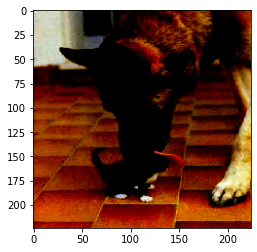

In [22]:
imgstest, labelstest = next(test_batches)
plt.imshow(imgstest[0])

In [23]:
Models.save("model.h5")